<a href="https://colab.research.google.com/github/niteshg97/Multi-Class-Particle-Classifier-with-Machine-Learning./blob/main/Multi_Class_Particle_Classifier_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  imports several Python libraries that are commonly used for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# This code cell imports the train_test_split function from the sklearn.model_selection module. This function is crucial for splitting datasets into training and testing sets, a standard practice in machine learning to evaluate model performance.
from  sklearn.model_selection import train_test_split

In [3]:
# This code cell first mounts  Google Drive to the Colab environment, allowing you to access files stored in  Drive.

from google.colab import drive
drive.mount('/content/drive')

# Replace 'your_file_path.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/pid-5M.csv'

Mounted at /content/drive


In [4]:
data = pd.read_csv(file_path)
data.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [5]:
# see the name of the Classes
print("Original Particle IDs and their counts:")
print(data.id.value_counts())

Original Particle IDs and their counts:
id
 211     2806833
 2212    1945849
 321      232471
-11        14847
Name: count, dtype: int64


In [6]:
# Checking the Missing Data
data.isnull().sum()

,0
id,0
p,0
theta,0
beta,0
nphe,0
ein,0
eout,0


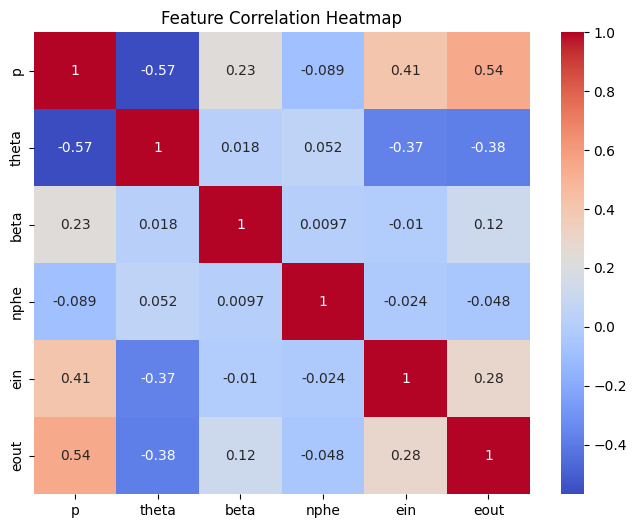

In [7]:
#  Random sample of 50000 Rows
data_sample = data.sample(n=50000, random_state=42)
y_multi = data_sample['id']
x_multi = data_sample.drop('id', axis=1)

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(x_multi.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

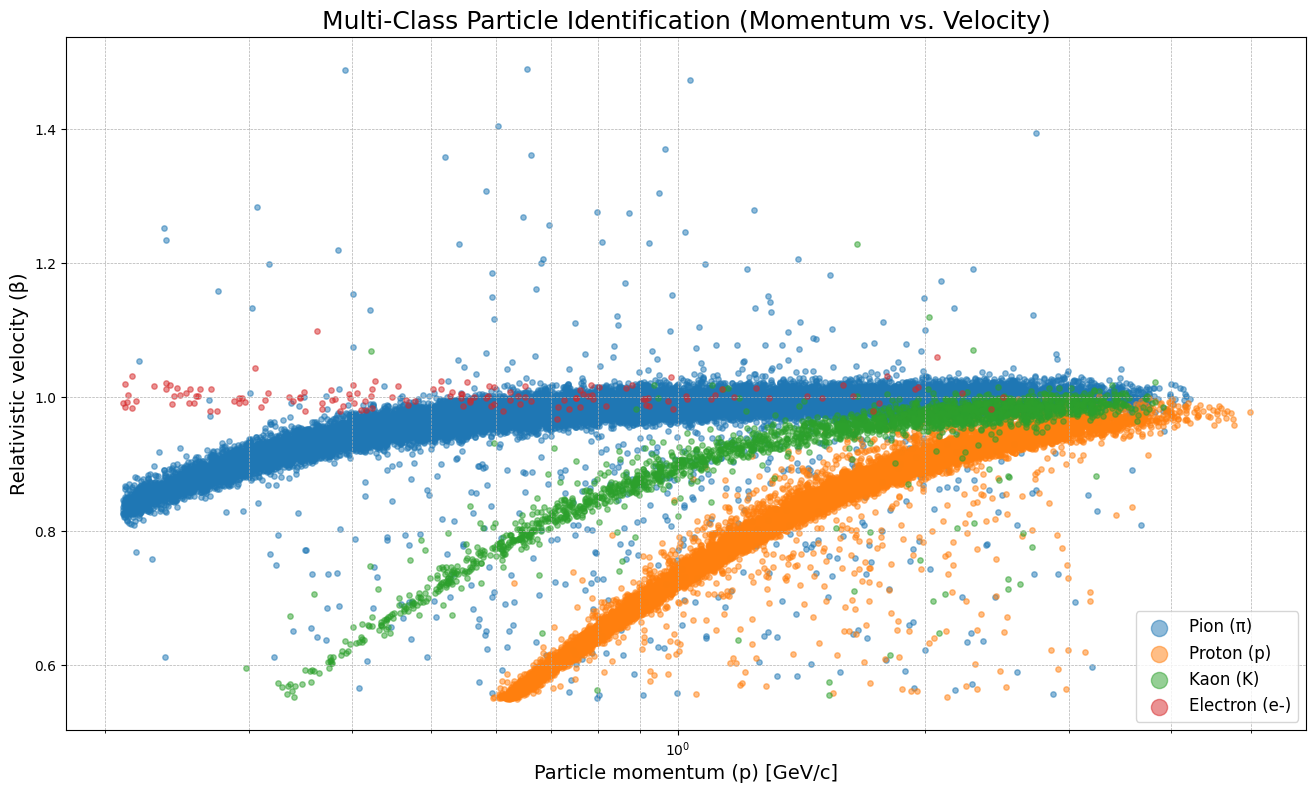

In [8]:
# Multi-Class Visualisation

# Defining label for each Particle type
labels_map = {
    211: "Pion (π)",
    2212: "Proton (p)",
    321: "Kaon (K)",
    -11: "Electron (e-)"
}

plt.figure(figsize=(16, 9))

# scatter plot  for every particle type
for particle_id, name in labels_map.items():
    subset = data_sample[data_sample['id'] == particle_id]
    plt.scatter(subset.p, subset.beta, label=name, alpha=0.5, s=15)

plt.xlabel('Particle momentum (p) [GeV/c]', fontsize=14)
plt.ylabel('Relativistic velocity (β)', fontsize=14)
plt.title('Multi-Class Particle Identification (Momentum vs. Velocity)', fontsize=18)
plt.legend(loc="lower right", fontsize=12, markerscale=3)
plt.xscale('log') # Momentum on log scale
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the Multi-class data
x_train_mc, x_test_mc, y_train_mc, y_test_mc = train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_mc)
x_test_scaled = scaler.transform(x_test_mc)

print(f"Training data shape: {x_train_scaled.shape}")
print(f"Test data shape: {x_test_scaled.shape}")

Training data shape: (40000, 6)
Test data shape: (10000, 6)


In [10]:
# 1. Logistic Regression (Multi-Class) ---
# we set 'multi_class='ovr'' (One-vs-Rest)
print("Training Logistic Regression...")
from sklearn.linear_model import LogisticRegression
LR_mc = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
LR_mc.fit(x_train_scaled, y_train_mc) #  Use of Scaled data
LR_pred_mc = LR_mc.predict(x_test_scaled)
print(f"Logistic Regression (Multi-Class) Accuracy: {accuracy_score(y_test_mc, LR_pred_mc)*100:.2f}%")

Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression (Multi-Class) Accuracy: 93.20%


In [11]:
#  2. K-Nearest Neighbors (Multi-Class)
# KNN directly Handles Multi-Class
print("\nTraining K-Nearest Neighbors...")
from sklearn.neighbors import KNeighborsClassifier
KNN_mc = KNeighborsClassifier(n_neighbors=4) # 4 classes
KNN_mc.fit(x_train_scaled, y_train_mc) # Use of Scaled data
KNN_pred_mc = KNN_mc.predict(x_test_scaled)
print(f"KNN (Multi-Class) Accuracy: {accuracy_score(y_test_mc, KNN_pred_mc)*100:.2f}%")


Training K-Nearest Neighbors...
KNN (Multi-Class) Accuracy: 95.62%


In [12]:
#  3. Decision Tree (Multi-Class)
print("\nTraining Decision Tree...")
from sklearn.tree import DecisionTreeClassifier
DTC_mc = DecisionTreeClassifier(random_state=0, criterion='entropy')
DTC_mc.fit(x_train_mc, y_train_mc) # No need of Scaling
DTC_pred_mc = DTC_mc.predict(x_test_mc)
print(f"Decision Tree (Multi-Class) Accuracy: {accuracy_score(y_test_mc, DTC_pred_mc)*100:.2f}%")


Training Decision Tree...
Decision Tree (Multi-Class) Accuracy: 95.59%


In [13]:
# Random Forest (Multi-Class)
print("\nTraining Random Forest...")
from sklearn.ensemble import RandomForestClassifier
RFC_mc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
RFC_mc.fit(x_train_mc, y_train_mc) # No need Of Scaling
RFC_pred_mc = RFC_mc.predict(x_test_mc)
RFC_accuracy_mc = accuracy_score(y_test_mc, RFC_pred_mc)
print(f"Random Forest (Multi-Class) Accuracy: {RFC_accuracy_mc*100:.2f}%")


Training Random Forest...
Random Forest (Multi-Class) Accuracy: 96.85%


--- Multi-Class Classification Report (Random Forest) ---
              precision    recall  f1-score   support

    Electron       0.89      0.28      0.42        29
        Kaon       0.76      0.72      0.74       425
        Pion       0.98      0.97      0.98      5669
      Proton       0.98      0.99      0.98      3877

    accuracy                           0.97     10000
   macro avg       0.90      0.74      0.78     10000
weighted avg       0.97      0.97      0.97     10000


--- Multi-Class Confusion Matrix (Random Forest) ---


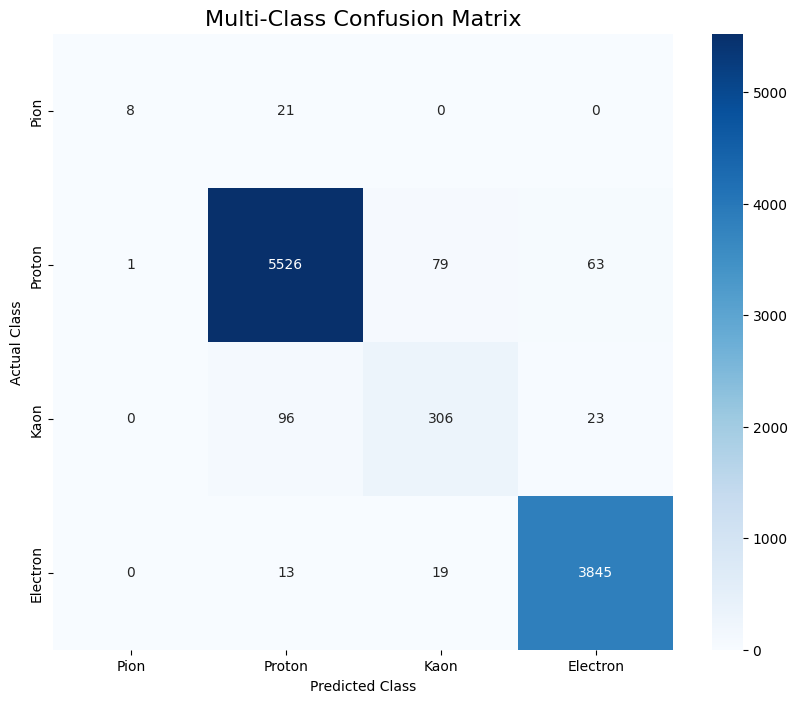

In [14]:
#  Multi-Class Model Evaluation (Random Forest)

print("--- Multi-Class Classification Report (Random Forest) ---")
# Giving names to the labels
labels_map = {211: "Pion", 2212: "Proton", 321: "Kaon", -11: "Electron"}
y_test_labels = y_test_mc.map(labels_map)
rfc_multi_pred_labels = pd.Series(RFC_pred_mc).map(labels_map)

# Precision, Recall, F1-score for Every Class
print(classification_report(y_test_labels, rfc_multi_pred_labels))

print("\n--- Multi-Class Confusion Matrix (Random Forest) ---")
cm_multi = confusion_matrix(y_test_mc, RFC_pred_mc)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_map.values(),
            yticklabels=labels_map.values())
plt.title('Multi-Class Confusion Matrix', fontsize=16)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Applying a Neural Network (Deep Learning)

In [15]:
# Applying a Neural Network (Deep Learning)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

print(f"TensorFlow Version: {tf.__version__}")

# Step A: Preapring Data for Neural Network


# Neural networks labels (y) in  "One-Hot Encoded" format
# Example: Pion = [1,0,0,0], Proton = [0,1,0,0], etc.

# 1. Integer Encode (Pion -> 0, Proton -> 1, Kaon -> 2, Electron -> 3)
label_encoder = LabelEncoder()
y_multi_encoded = label_encoder.fit_transform(y_multi)

# 2. One-Hot Encode
onehot_encoder = OneHotEncoder(sparse_output=False)
y_multi_onehot = onehot_encoder.fit_transform(y_multi_encoded.reshape(-1, 1))

# Spliting of One-Hot data
# (Features 'x_multi')
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(x_multi, y_multi_onehot, test_size=0.2, random_state=42)

# Scaling features For NN
scaler_nn = StandardScaler()
x_train_scaled_nn = scaler_nn.fit_transform(x_train_nn)
x_test_scaled_nn = scaler_nn.transform(x_test_nn)

print(f"NN Training Features Shape: {x_train_scaled_nn.shape}")
print(f"NN Training Target Shape (One-Hot): {y_train_nn.shape}")



# Step B: Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=x_train_scaled_nn.shape[1], activation='relu')) # Input layer
model.add(Dropout(0.3)) # To Avoid Overfitting
model.add(Dense(32, activation='relu')) # Hidden layer
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax')) # Output layer (4 neurons,for Every Class)

# model compiling
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  #  for Multi-class problem
              metrics=['accuracy'])

print(model.summary())

TensorFlow Version: 2.19.0
NN Training Features Shape: (40000, 6)
NN Training Target Shape (One-Hot): (40000, 4)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,660 (10.39 KB)

 Trainable params: 2,660 (10.39 KB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
# Step C:  Training the Neural Network Model
print("\nTraining Neural Network...")
# For 30 epoch
history = model.fit(x_train_scaled_nn, y_train_nn,
                    validation_split=0.2, # 20% training data for Validation
                    epochs=30,
                    batch_size=64,
                    verbose=1)


Training Neural Network...
Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8121 - loss: 0.6199 - val_accuracy: 0.9383 - val_loss: 0.1970
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9321 - loss: 0.2333 - val_accuracy: 0.9465 - val_loss: 0.1621
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9437 - loss: 0.1872 - val_accuracy: 0.9579 - val_loss: 0.1400
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9536 - loss: 0.1638 - val_accuracy: 0.9630 - val_loss: 0.1284
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9552 - loss: 0.1579 - val_accuracy: 0.9644 - val_loss: 0.1258
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9589 - loss: 0.1437 - val_accuracy: 0.9654 - val_loss: 0.1185
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9593 - loss: 0.1391 - val_accuracy: 0.9669 - val_loss: 0.1139
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9627 - los


Plotting Model Performance...


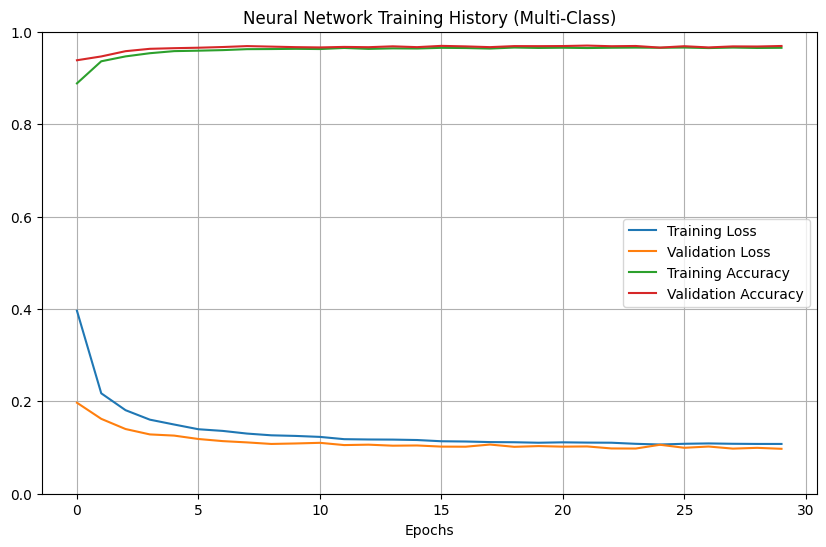

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9642 - loss: 0.1002

Neural Network Test Accuracy: 96.65%


In [17]:
# --- Step D: Visualization of Neural Network  Performance
print("\nPlotting Model Performance...")

# Plot of Training History
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Training History (Multi-Class)')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0, 1) #setting Y - Axis Between 0  and 1
plt.show()

# Step E:  Final Accuracy on Test Set
loss, accuracy = model.evaluate(x_test_scaled_nn, y_test_nn)
print(f"\nNeural Network Test Accuracy: {accuracy * 100:.2f}%")

In [18]:
print("--- Neural Network Classification Report ---")
y_pred_nn_probs = model.predict(x_test_scaled_nn)
y_pred_nn_encoded = np.argmax(y_pred_nn_probs, axis=1)

# Encoded labels (0, 1, 2, 3) to  original IDs
y_pred_nn_original = label_encoder.inverse_transform(y_pred_nn_encoded)
nn_report_dict = classification_report(y_test_mc, y_pred_nn_original, output_dict=True)
labels_map = {211: "Pion", 2212: "Proton", 321: "Kaon", -11: "Electron"}
y_test_labels = y_test_mc.map(labels_map)
y_pred_nn_labels = pd.Series(y_pred_nn_original).map(labels_map)
print(classification_report(y_test_labels, y_pred_nn_labels))
nn_report_for_plotting = nn_report_dict

--- Neural Network Classification Report ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    Electron       0.73      0.38      0.50        29
        Kaon       0.69      0.77      0.73       425
        Pion       0.98      0.97      0.98      5669
      Proton       0.98      0.99      0.98      3877

    accuracy                           0.97     10000
   macro avg       0.85      0.78      0.80     10000
weighted avg       0.97      0.97      0.97     10000



Comparison Plots...


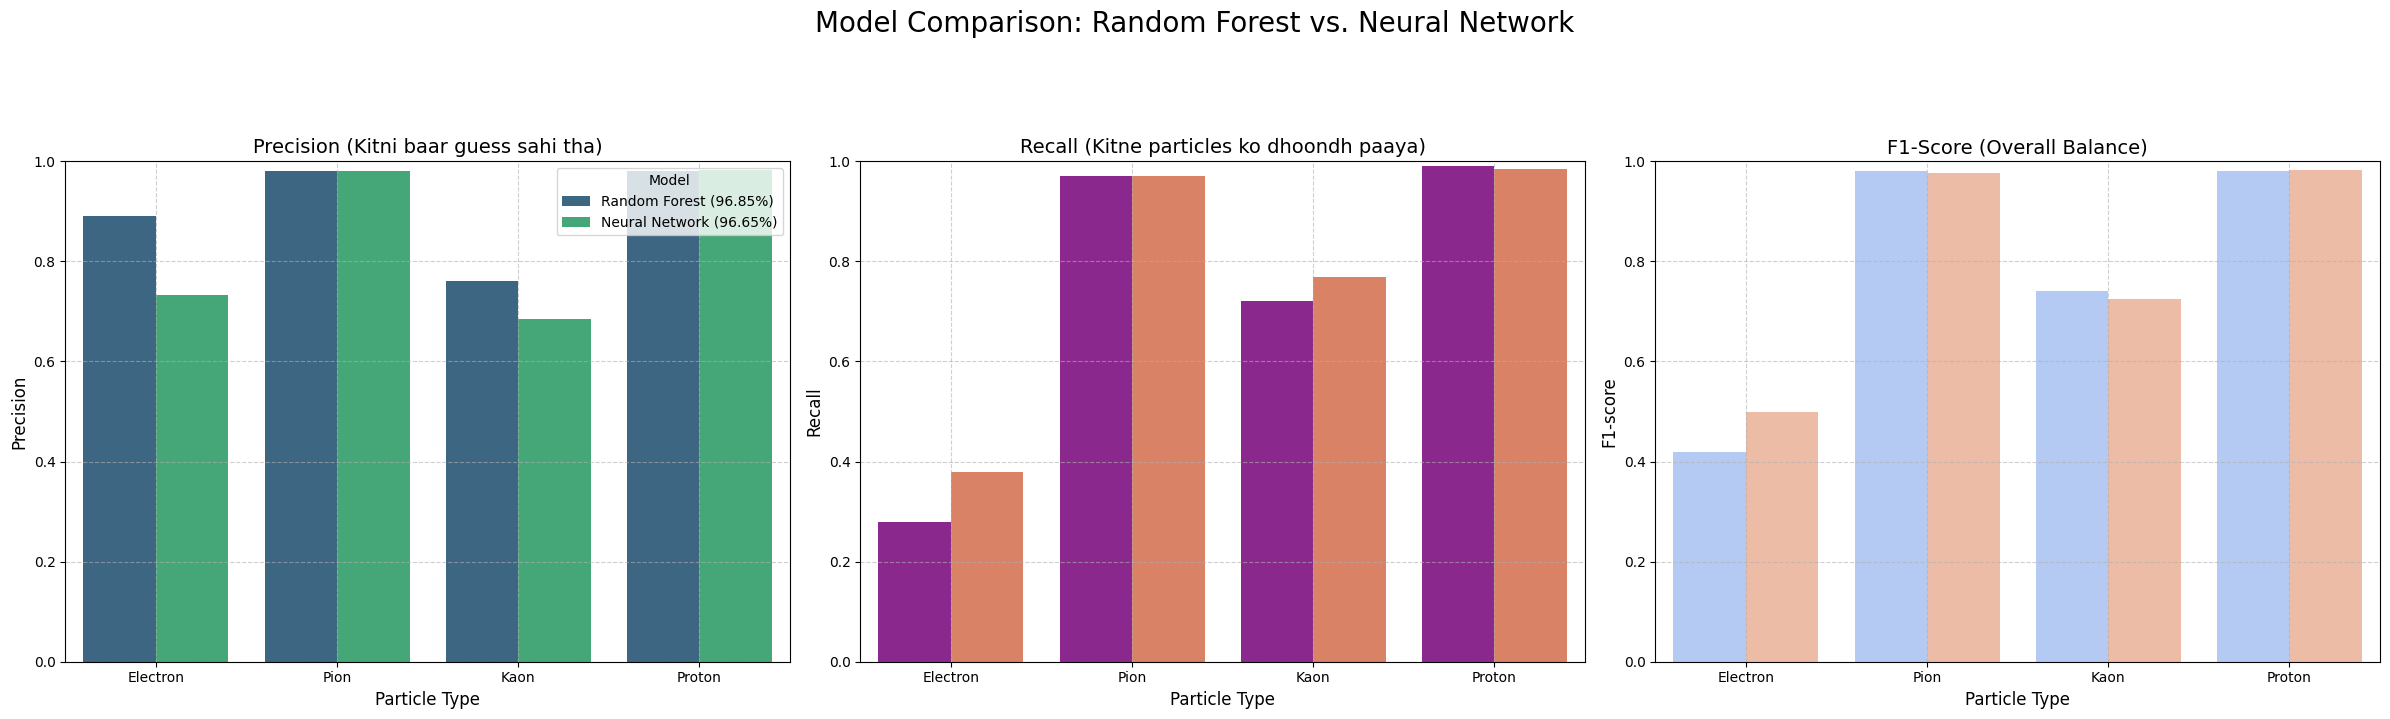

In [19]:
# Making Directory of Random Forest
rf_report_for_plotting = {
    '-11': {'precision': 0.89, 'recall': 0.28, 'f1-score': 0.42, 'support': 29.0},
    '211': {'precision': 0.98, 'recall': 0.97, 'f1-score': 0.98, 'support': 5669.0},
    '321': {'precision': 0.76, 'recall': 0.72, 'f1-score': 0.74, 'support': 425.0},
    '2212': {'precision': 0.98, 'recall': 0.99, 'f1-score': 0.98, 'support': 3877.0},
    'accuracy': 0.9685,
    'macro avg': {'precision': 0.9, 'recall': 0.74, 'f1-score': 0.78, 'support': 10000.0},
    'weighted avg': {'precision': 0.97, 'recall': 0.97, 'f1-score': 0.97, 'support': 10000.0}
}

# converting to data Frame
rf_df = pd.DataFrame(rf_report_for_plotting).transpose()
rf_df['Model'] = 'Random Forest (96.85%)'
nn_df = pd.DataFrame(nn_report_for_plotting).transpose()
nn_df['Model'] = f'Neural Network ({accuracy*100:.2f}%)' # Overall accuracy add

# combin for plotting
combined_df = pd.concat([rf_df, nn_df])

particle_ids_str = [str(id) for id in labels_map.keys()]
combined_df = combined_df[combined_df.index.isin(particle_ids_str)]

combined_df = combined_df.reset_index().rename(columns={'index': 'Particle ID'})
combined_df['Particle ID'] = combined_df['Particle ID'].astype(int).map(labels_map)

#  Visualize
print("Comparison Plots...")
plt.figure(figsize=(24, 7))
plt.suptitle('Model Comparison: Random Forest vs. Neural Network', fontsize=20, y=1.05)

metrics_to_plot = ['precision', 'recall', 'f1-score']
palettes = ['viridis', 'plasma', 'coolwarm']
titles = ['Precision (Kitni baar guess sahi tha)', 'Recall (Kitne particles ko dhoondh paaya)', 'F1-Score (Overall Balance)']

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i+1)
    sns.barplot(data=combined_df, x='Particle ID', y=metric, hue='Model', palette=palettes[i])
    plt.title(titles[i], fontsize=14)
    plt.ylim(0, 1.0) # Y-axis ko 0 to 1
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.xlabel('Particle Type', fontsize=12)
    if i > 0:
        plt.legend().set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()